In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

[*********************100%***********************]  7 of 7 completed


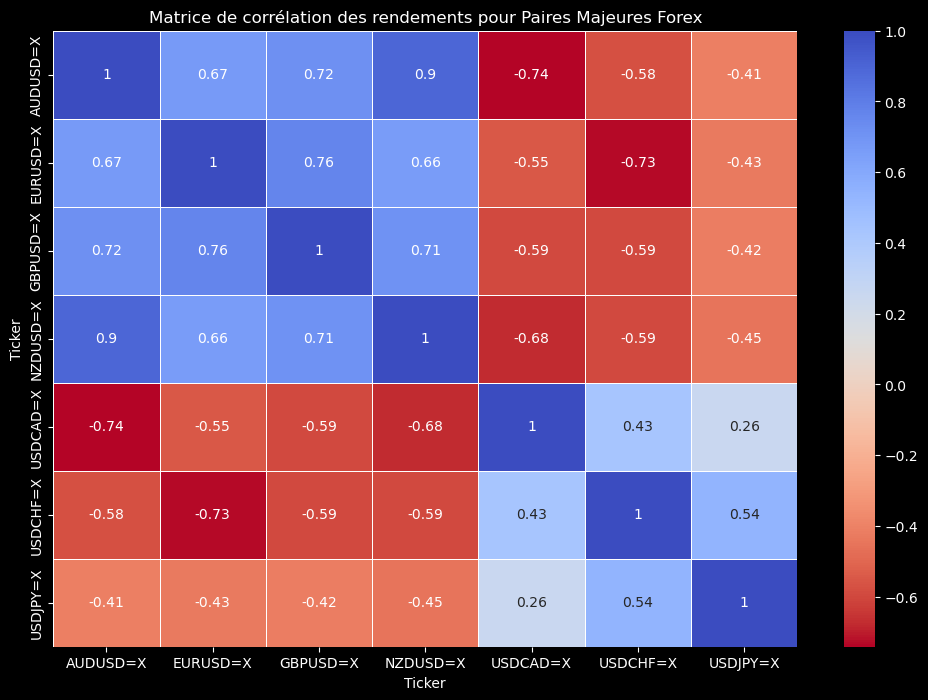

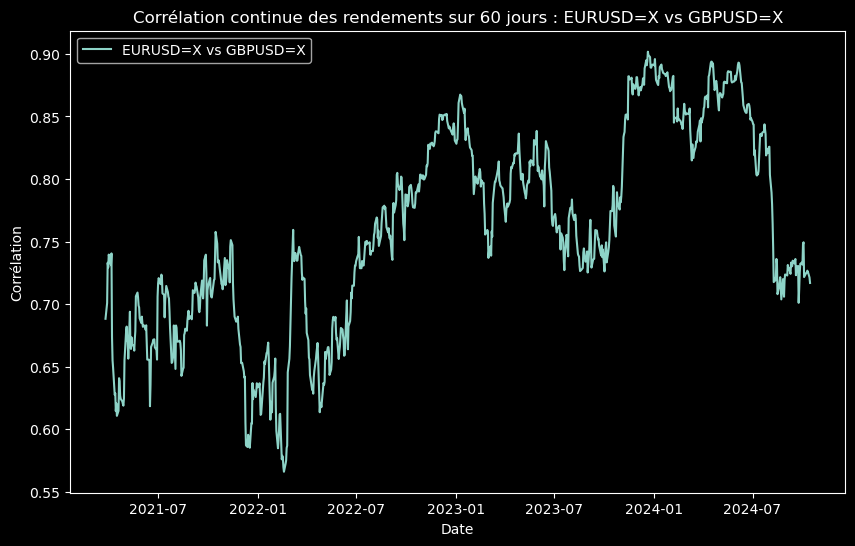

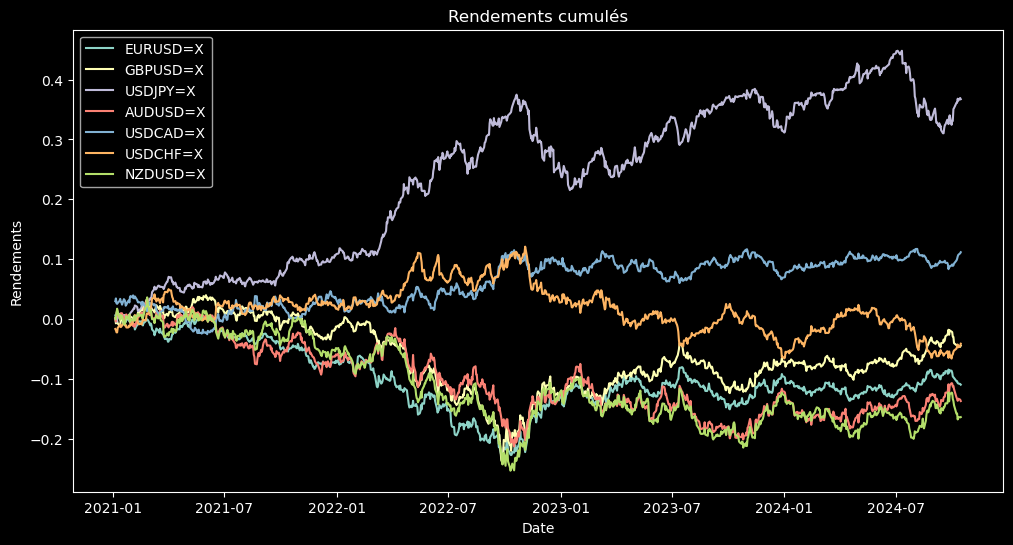

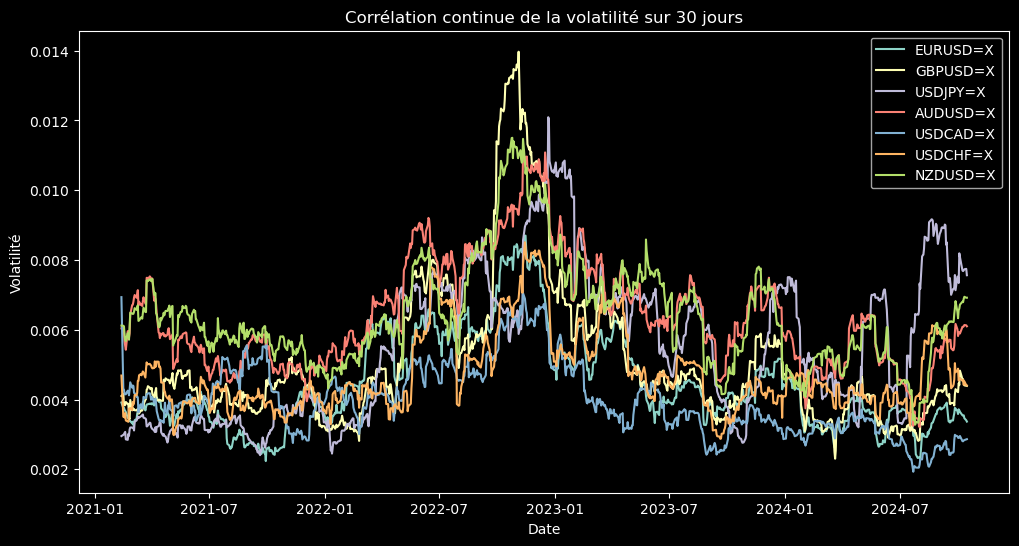

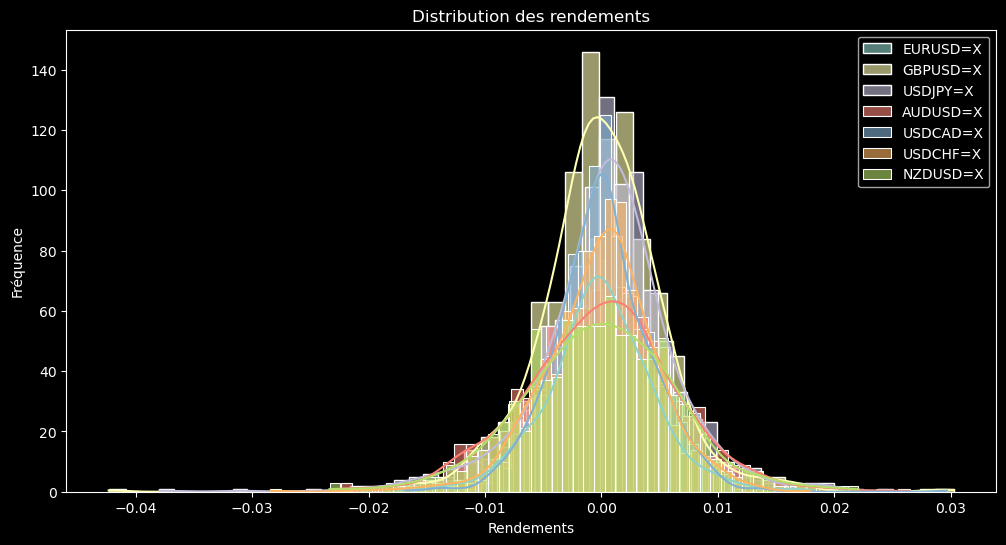

,Moyenne,Variance,Skew,Kurtosis
Ticker,,,,
AUDUSD=X,-0.000139,0.000043,-0.030308,3.743009
EURUSD=X,-0.000111,0.000021,0.038988,4.21192
GBPUSD=X,-0.000045,0.00003,-0.269361,8.682717
NZDUSD=X,-0.000166,0.000043,-0.09105,3.704455
USDCAD=X,0.000113,0.000017,0.302988,5.91789
USDCHF=X,-0.000042,0.000024,-0.504734,5.179443
USDJPY=X,0.000372,0.000036,-0.602057,6.882729


[*********************100%***********************]  10 of 10 completed


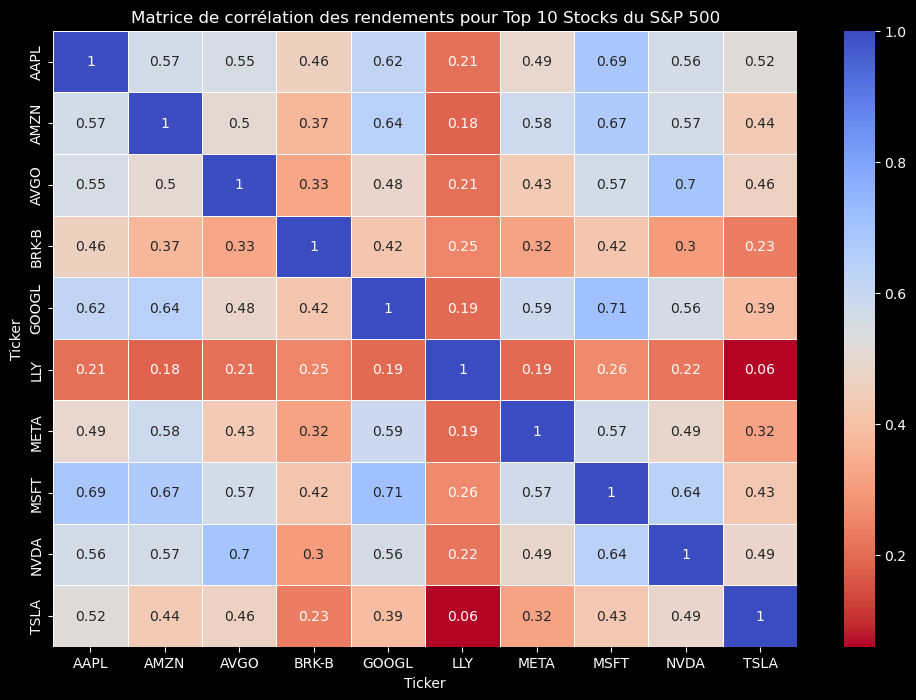

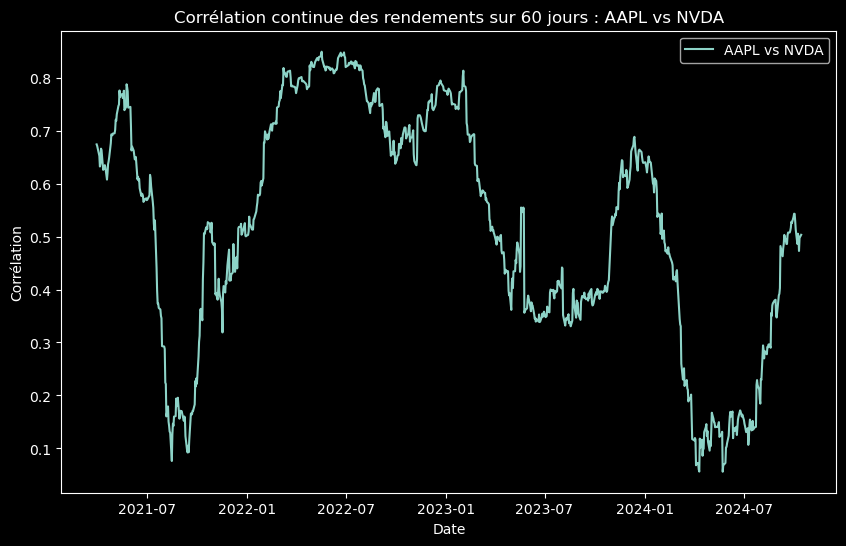

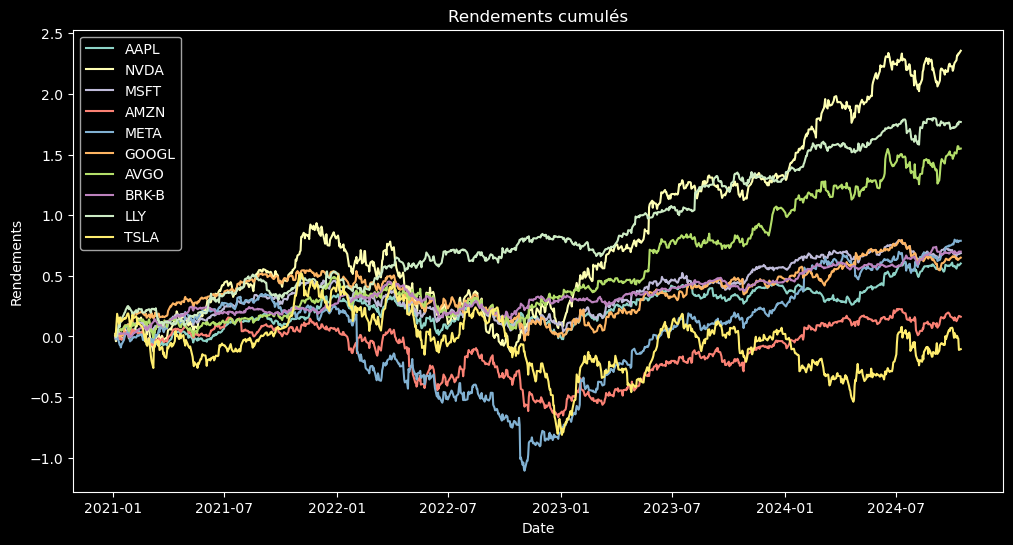

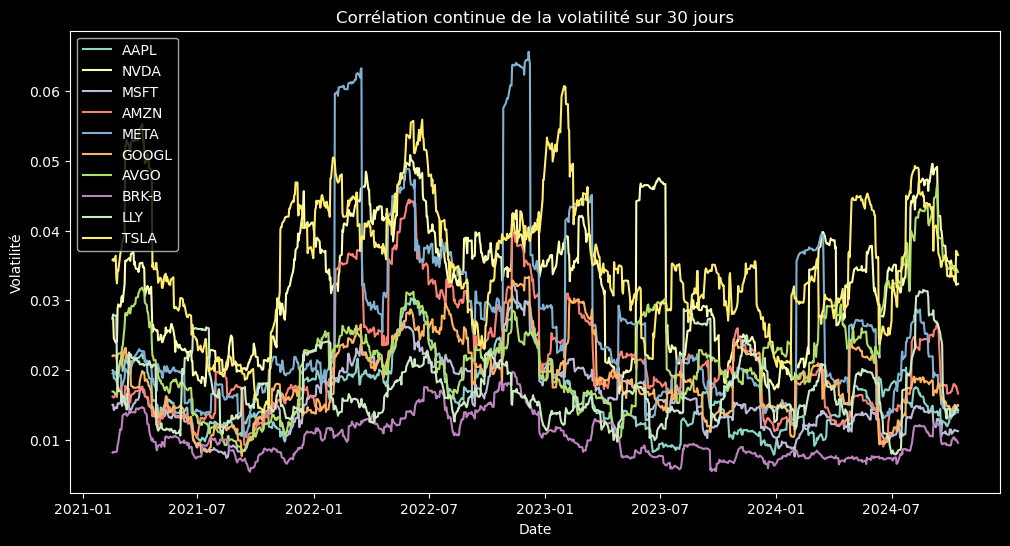

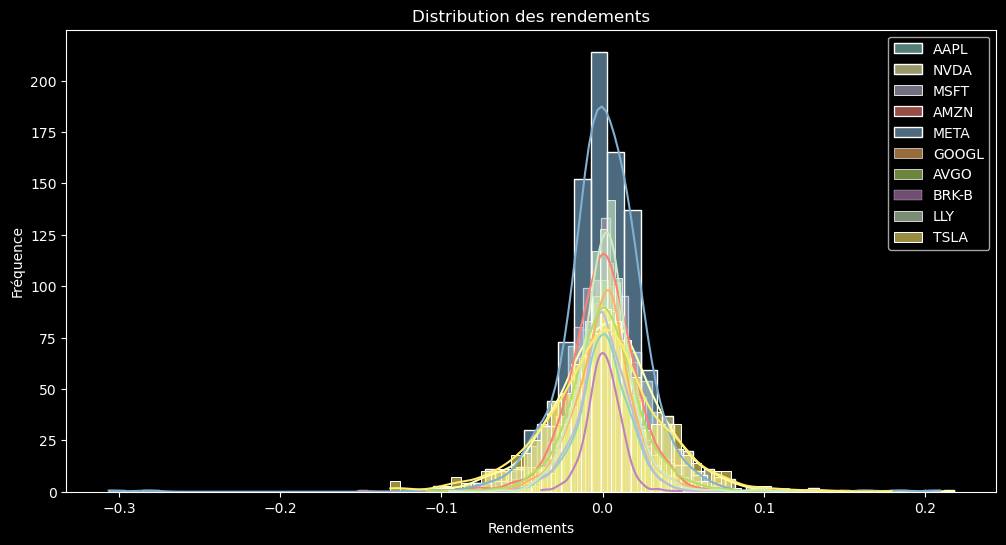

,Moyenne,Variance,Skew,Kurtosis
Ticker,,,,
AAPL,0.000634,0.00029,0.059194,4.826669
AMZN,0.000172,0.000502,-0.180489,8.102256
AVGO,0.001631,0.000526,0.240469,5.916241
BRK-B,0.000737,0.000113,0.050509,4.389434
GOOGL,0.000684,0.000378,-0.133101,6.113896
LLY,0.001862,0.000334,0.966565,10.566144
META,0.000831,0.000843,-1.441526,30.538322
MSFT,0.000723,0.000274,-0.050773,4.783017
NVDA,0.002481,0.001118,0.381465,5.692392


In [2]:
def fetch_log_returns(tickers, start="2021-01-01"):
    data = yf.download(tickers, start=start)['Adj Close'].dropna()
    log_returns = np.log(data / data.shift(1)).dropna()
    return log_returns

def plot_correlation_matrix(log_returns, title='Matrice de corrélation des rendements'):
    correlation_matrix = log_returns.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm_r', linewidths=0.5)
    plt.title(title)
    plt.show()

def plot_scatter(log_returns, asset1, asset2):
    plt.figure(figsize=(10, 6))
    plt.scatter(log_returns[asset1], log_returns[asset2], alpha=0.5)
    plt.title(f'Corrélation des rendements entre {asset1} et {asset2}')
    plt.xlabel(f'Rendements {asset1}')
    plt.ylabel(f'Rendements {asset2}')
    plt.show()

def plot_rolling_correlation(log_returns, asset1, asset2, window=60):
    rolling_corr = log_returns[asset1].rolling(window).corr(log_returns[asset2])
    plt.figure(figsize=(10, 6))
    plt.plot(rolling_corr, label=f'{asset1} vs {asset2}')
    plt.title(f'Corrélation continue des rendements sur {window} jours : {asset1} vs {asset2}')
    plt.xlabel('Date')
    plt.ylabel(f'Corrélation')
    plt.legend()
    plt.show()

def plot_extreme_correlation_periods(log_returns, tickers):
    plt.figure(figsize=(12, 6))
    for asset in tickers:
        plt.plot(log_returns[asset].rolling(window=30).std(), label=asset)
    plt.title("Corrélation continue de la volatilité sur 30 jours")
    plt.xlabel('Date')
    plt.ylabel('Volatilité')
    plt.legend()
    plt.show()

def plot_cumulative_log_returns(log_returns, tickers):
    cumulative_log_returns = log_returns.cumsum()
    plt.figure(figsize=(12, 6))
    for asset in tickers:
        plt.plot(cumulative_log_returns[asset], label=asset)
    plt.title('Rendements cumulés')
    plt.xlabel('Date')
    plt.ylabel('Rendements')
    plt.legend()
    plt.show()

def plot_returns_distribution(log_returns, tickers):
    plt.figure(figsize=(12, 6))
    for asset in tickers:
        sns.histplot(log_returns[asset], kde=True, label=asset, bins=50, alpha=0.6)
    plt.title('Distribution des rendements')
    plt.xlabel('Rendements')
    plt.ylabel('Fréquence')
    plt.legend()
    plt.show()

def calculate_moments(log_returns):
    moments = pd.DataFrame(columns=['Moyenne', 'Variance', 'Skew', 'Kurtosis'], index=log_returns.columns)
    
    for stock in log_returns.columns:
        stock_returns = log_returns[stock]
        moments.at[stock, 'Moyenne'] = stock_returns.mean()
        moments.at[stock, 'Variance'] = stock_returns.var()
        moments.at[stock, 'Skew'] = stats.skew(stock_returns)
        moments.at[stock, 'Kurtosis'] = stats.kurtosis(stock_returns, fisher=False) # fisher false pour l'excess kurtosis, mais pas obligé
    
    display(moments)

def run_analysis(tickers, title):
    log_returns = fetch_log_returns(tickers)
    
    plot_correlation_matrix(log_returns, title=f'Matrice de corrélation des rendements pour {title}')
    
    plot_rolling_correlation(log_returns, tickers[0], tickers[1])
    
    plot_cumulative_log_returns(log_returns, tickers)
    
    plot_extreme_correlation_periods(log_returns, tickers)
    
    plot_returns_distribution(log_returns, tickers)
    
    calculate_moments(log_returns)

forex = ['EURUSD=X', 'GBPUSD=X', 'USDJPY=X', 'AUDUSD=X', 'USDCAD=X', 'USDCHF=X', 'NZDUSD=X']
run_analysis(forex, title="Paires Majeures Forex")

stocks = ['AAPL', 'NVDA', 'MSFT', 'AMZN', 'META', 'GOOGL', 'AVGO', 'BRK-B', 'LLY', 'TSLA']
run_analysis(stocks, title="Top 10 Stocks du S&P 500")